# Capstone Project 1 - Data Story
## Name: Brock Nosbisch

#### Summary:
This is a continuation from the "Capstone Project 1 - Data Wrangling" notebook.  The data from the "Data Wrangling" notebooks was written to the data_wrangling_out.csv file which is read in below. There are approximately 150,000 samples and here are some observations made. The details of these observations can be found in the "Data Story Summary" section and additional details can be found in the Annex.
* The younger in age you are, the higher the probability that you will be 60-89 Days Past Due, 90+ Days Past Due, and/or Serious Delinquent.
* The 1000-2499 and 2500-4999 Monthly Income Ranges are most likely to be Past Due when compared to other income ranges.
* The Debt Ratio quantiles show that the Past Due Bucket averages gradually increase from the 0-10% quantile, dip a little bit after the 11-20% quantile, stay flat until the 41-50% quantile, and then keep rising up to the 71-80% quantile where the average is highest.
* The 60-89, 90+, and Serious Delinquent averages are flat after the # of Open Credit Lines reaches ~4 and above.  (Do note that any Open Credit Limits with < 500 people are excluded (# > 23))

So it is clear, here are the definitions of the different fields mentioned in this project:
* 30-59 Days Past Due: Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
* 60-89 Days Past Due: Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
* 90+ Days Past Due: Number of time borrower has been 90 days or more past due.
* Serious Delinquent: Flag to show if a person experiences 90 days past due delinquency or worse.
* Age: Age of borrower in years.
* Age Bucket: Age of borrower bucketted in 10 year increments (20-29, 30-39, 40-49, ... 90-99, 100+)
* Monthly Income: Monthly income.
* Monthly Income Range: Monthly income bucketted (0-499, 500-999, 1000-2499, 2500-4999, 5000-7499, 7500-9999, 10000-24999, 25000-49999, 50000+); NULL means that no monthly income value was provided.
* Debt Ratio: Monthly debt payments, alimony, living costs divided by monthly gross income.
* Debt Ratio Quantile: 10% increments of the Debt Ratio.  Each 10% bucket contains approximately the same amount of people.
* Number of Open Credit Lines (and Loans): Number of open loans (installment like car loan or mortgage) and lines of credit (e.g. credit cards)
* Unsecured Lines: Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits.
* Real Estate Loans: Number of mortgage and real estate loans including home equity lines of credit.
* Number of Dependents: Number of dependents in family excluding themselves (spouse, children, etc.)


# Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
# from statsmodels.nonparametric.kernel_regression import KernelReg

file_name = 'data_wrangling_out.csv'
df = pd.read_csv(file_name, header=0, na_values ='-1')
df.set_index('id', inplace=True)

# Reorder columns
new_col_ordering = [ 'age', 'age_bucket', 'age_bucket_name', 'debt_ratio', 'debt_ratio_bucket', 'debt_ratio_name',
                    'monthly_income', 'monthly_income_bucket', 'monthly_income_name', 
                    'past_due_30_59', 'past_due_30_59_flag', 
                    'past_due_60_89', 'past_due_60_89_flag', 
                    'past_due_90_plus', 'past_due_90_plus_flag',
                    'open_credit_lines', 'serious_delinquent', 'unsecured_lines', 
                    'real_estate_loans', 'number_of_dependents']
df = df[new_col_ordering]

# Creation Functions Used.
def add_value_labels(ax, spacing=5):

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        va = 'bottom'

        if y_value < 0:
            space *= -1
            # Vertical alignment
            va = 'top'

        label = "{:}".format(y_value)  # Use :.1f if wanting decimals.

        # Create annotation
        ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va=va) 
        
        
# Load constants used later.
debt_ratio_column_names = ('0-10%','11-20%','21-30%','31-40%','41-50%','51-60%','61-70%','71-80%','81-90%','91-100%')

# Age Bucket Names
age_bucket_col_names = ('20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99', '100+') # For Bar Graphs
age_bucket_col_name_line = ('','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99', '100+') # For Line Graphs

# Monthly Income Bucket Names
monthly_income_bucket_col_names = ('NULL','0-499', '500-999', '1000-2499', '2500-4999', '5000-7499', '7500-9999', '10000-24999', '25000-49999','50000+')
monthly_income_bucket_col_line = ('', 'NULL','0-499', '500-999', '1000-2499', '2500-4999', '5000-7499', '7500-9999', '10000-24999', '25000-49999','50000+')

# Data Story Summary

## Past Due by Age

### Total Count of People by Age Bucket

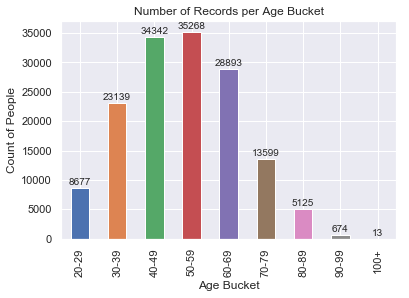

In [2]:
age_bucket_plot = df.groupby('age_bucket_name')['serious_delinquent'].count().plot(kind='bar')
age_bucket_plot.set_title('Number of Records per Age Bucket')
age_bucket_plot.set_xlabel('Age Bucket')
age_bucket_plot.set_ylabel('Count of People')
age_bucket_plot.set_xticklabels(age_bucket_col_names)
add_value_labels(age_bucket_plot,1)

plt.show()


### Averages by Past Due Buckets by Age Range
#### You can see the younger you are, the higher probability that you will be 60-89 Days Past Due, 90+ Days Past Due, and/or Serious Delinquent.  Ignore the spike in 100+ age group since there were only 13  people falling into that age range.

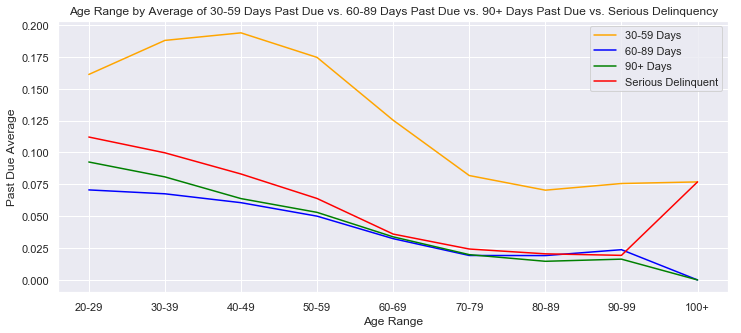

In [3]:
plt.figure(figsize=(12,5))
age_bucket_plot = df.groupby('age_bucket')['past_due_30_59_flag'].mean().plot(kind='line', color='orange', grid=True, label='30-59 Days')
age_bucket_plot.set_title('Age Range by Average of 30-59 Days Past Due vs. 60-89 Days Past Due vs. 90+ Days Past Due vs. Serious Delinquency')

age_bucket_plot2 = df.groupby('age_bucket')['past_due_60_89_flag'].mean().plot(kind='line', color='blue', grid=True, label='60-89 Days')
age_bucket_plot3 = df.groupby('age_bucket')['past_due_90_plus_flag'].mean().plot(kind='line', color='green', grid=True, label='90+ Days')
age_bucket_plot4 = df.groupby('age_bucket')['serious_delinquent'].mean().plot(kind='line', color='red', grid=True, label='Serious Delinquent')

age_bucket_plot.set_xlabel('Age Range')
age_bucket_plot.set_ylabel('Past Due Average')

age_bucket_plot.set_xticklabels(age_bucket_col_name_line)

h1, l1 = age_bucket_plot.get_legend_handles_labels() 

plt.legend(h1, l1, loc=1) #loc=1 is top right

plt.show()

## Past Due by Monthly Income

### Total Count of People by Monthly Income Range
#### You can see that there are ~30k people that had No Monthly Incomes.  We are including this in our dataset.

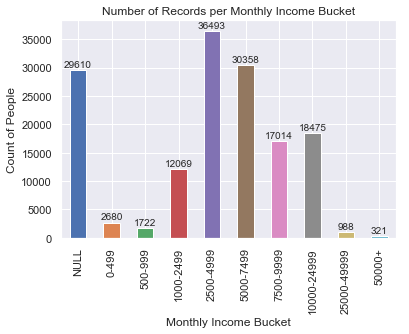

In [4]:
monthly_income_bucket_plot = df[(df['past_due_90_plus'] < 90)].groupby('monthly_income_bucket')['past_due_90_plus'].count().plot(kind='bar')
monthly_income_bucket_plot.set_title('Number of Records per Monthly Income Bucket')
monthly_income_bucket_plot.set_xlabel('Monthly Income Bucket')
monthly_income_bucket_plot.set_ylabel('Count of People')
monthly_income_bucket_plot.set_xticklabels(monthly_income_bucket_col_names)
add_value_labels(monthly_income_bucket_plot,1)
plt.show()

### Averages by Past Due Buckets by Monthly Income
#### You can see that on average, the 1000-2499 and 2500-4999 Monthly Income Ranges are more likely to be Past Due.  

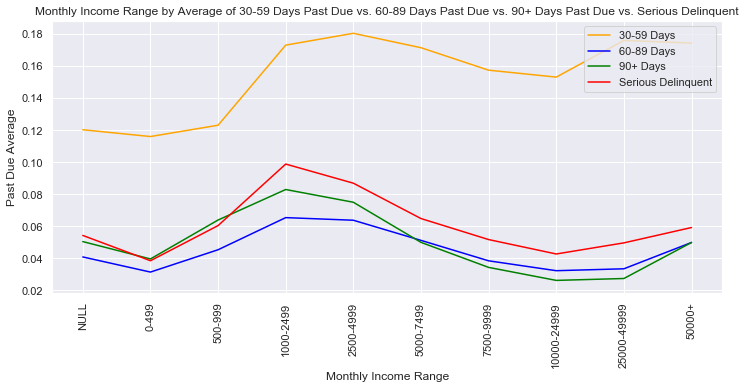

In [5]:
plt.figure(figsize=(12,5))
monthly_income_bucket_plot = df.groupby('monthly_income_bucket')['past_due_30_59_flag'].mean().plot(kind='line', color='orange', grid=True, label='30-59 Days')
monthly_income_bucket_plot.set_title('Monthly Income Range by Average of 30-59 Days Past Due vs. 60-89 Days Past Due vs. 90+ Days Past Due vs. Serious Delinquent')

monthly_income_bucket_plot2 = df.groupby('monthly_income_bucket')['past_due_60_89_flag'].mean().plot(kind='line', color='blue', grid=True, label='60-89 Days')
monthly_income_bucket_plot3 = df.groupby('monthly_income_bucket')['past_due_90_plus_flag'].mean().plot(kind='line', color='green', grid=True, label='90+ Days')
monthly_income_bucket_plot4 = df.groupby('monthly_income_bucket')['serious_delinquent'].mean().plot(kind='line', color='red', grid=True, label='Serious Delinquent')

monthly_income_bucket_plot.set_xlabel('Monthly Income Range')
monthly_income_bucket_plot.set_ylabel('Past Due Average')

plt.xticks(rotation=90)
monthly_income_bucket_plot.set_xticks(np.arange(len(monthly_income_bucket_col_names)))

monthly_income_bucket_plot.set_xticklabels(monthly_income_bucket_col_names)
add_value_labels(monthly_income_bucket_plot,2)
h1, l1 = monthly_income_bucket_plot.get_legend_handles_labels()

plt.legend(h1, l1, loc=1)

plt.show()

# Past Due by Debt Ratio

### Total Count of People by Debt Ratio Quantile.  
#### This is to just show that each quantile does have about the same # of people.

In [6]:
df.groupby('debt_ratio_bucket')['serious_delinquent'].count()

debt_ratio_bucket
0.0    14973
1.0    14973
2.0    14973
3.0    14973
4.0    14973
5.0    14973
6.0    14974
7.0    15055
8.0    14892
9.0    14971
Name: serious_delinquent, dtype: int64

### Averages by Past Due Buckets by Debt Ratio Quantile
#### You can see the Past Due Buckets gradually increase from the 0-10% quantile, dip a little bit after the 11-20% quantile, stay flat until the 41-50% quantile, and then keep rising up to the 71-80% quantile where the average is highest.

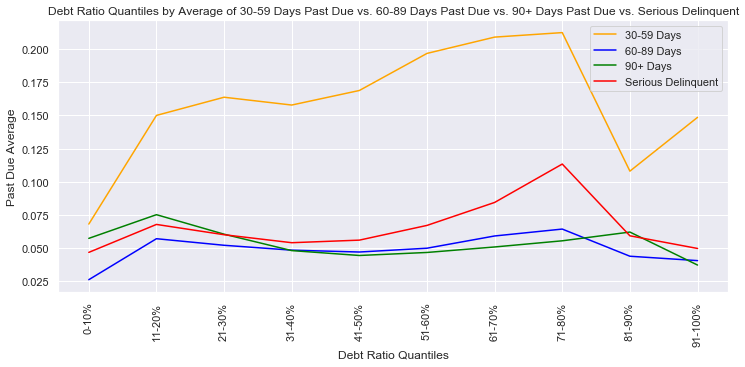

In [7]:
plt.figure(figsize=(12,5))
debt_ratio_plot = df.groupby('debt_ratio_bucket')['past_due_30_59_flag'].mean().plot(kind='line', color='orange', grid=True, label='30-59 Days')
debt_ratio_plot.set_title('Debt Ratio Quantiles by Average of 30-59 Days Past Due vs. 60-89 Days Past Due vs. 90+ Days Past Due vs. Serious Delinquent')

debt_ratio_plot2 = df.groupby('debt_ratio_bucket')['past_due_60_89_flag'].mean().plot(kind='line', color='blue', grid=True, label='60-89 Days')
debt_ratio_plot3 = df.groupby('debt_ratio_bucket')['past_due_90_plus_flag'].mean().plot(kind='line', color='green', grid=True, label='90+ Days')
debt_ratio_plot4 = df.groupby('debt_ratio_bucket')['serious_delinquent'].mean().plot(kind='line', color='red', grid=True, label='Serious Delinquent')

debt_ratio_plot.set_xlabel('Debt Ratio Quantiles')
debt_ratio_plot.set_ylabel('Past Due Average')

plt.xticks(rotation=90)
debt_ratio_plot.set_xticks(np.arange(len(debt_ratio_column_names)))

debt_ratio_plot.set_xticklabels(debt_ratio_column_names)
add_value_labels(debt_ratio_plot,1)
h1, l1 = debt_ratio_plot.get_legend_handles_labels()

plt.legend(h1, l1, loc=1)

plt.show()

# Past Due by Open Credit Lines

### When evaluating Past Due Buckets by # of Open Credit Lines that the 60-89, 90+, and Serious Delinquent Averages are flat after the # of Open Credit Lines reaches ~4 and above.
*Do note that any Open Credit Limits with < 500 people are excluded (# > 23)

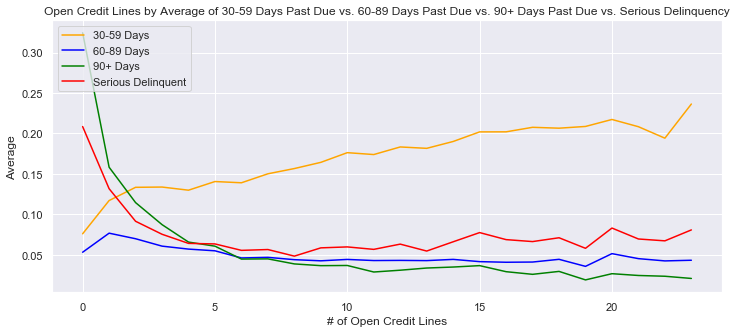

In [8]:
plt.figure(figsize=(12,5))
age_bucket_plot = df[(df['open_credit_lines'] <= 23)].groupby('open_credit_lines')['past_due_30_59_flag'].mean().plot(kind='line', color='orange', grid=True, label='30-59 Days')
age_bucket_plot.set_title('Open Credit Lines by Average of 30-59 Days Past Due vs. 60-89 Days Past Due vs. 90+ Days Past Due vs. Serious Delinquency')


age_bucket_plot2 = df[(df['open_credit_lines'] <= 23)].groupby('open_credit_lines')['past_due_60_89_flag'].mean().plot(kind='line', color='blue', grid=True, label='60-89 Days')

age_bucket_plot3 = df[(df['open_credit_lines'] <= 23)].groupby('open_credit_lines')['past_due_90_plus_flag'].mean().plot(kind='line', color='green', grid=True, label='90+ Days')
age_bucket_plot4 = df[(df['open_credit_lines'] <= 23)].groupby('open_credit_lines')['serious_delinquent'].mean().plot(kind='line', color='red', grid=True, label='Serious Delinquent')
age_bucket_plot.set_xlabel('# of Open Credit Lines')
age_bucket_plot.set_ylabel('Average')
h1, l1 = age_bucket_plot.get_legend_handles_labels()

plt.legend(h1, l1, loc=2)

plt.show()

# ANNEX

### Out of the original 150,000 records in the dataset, we have removed 1 record for Age = 0 and 269 records for having Past Due values of > 25.

In [9]:
df.describe()

,age,age_bucket,debt_ratio,debt_ratio_bucket,debt_ratio_name,monthly_income,monthly_income_bucket,past_due_30_59,past_due_30_59_flag,past_due_60_89,past_due_60_89_flag,past_due_90_plus,past_due_90_plus_flag,open_credit_lines,serious_delinquent,unsecured_lines,real_estate_loans,number_of_dependents
count,149730.000000,149730.000000,149730.000000,149730.000000,149730.000000,1.201200e+05,149730.000000,149730.000000,149730.000000,149730.000000,149730.000000,149730.000000,149730.000000,149730.000000,149730.000000,149730.000000,149730.000000,145837.000000
mean,52.327984,3.783450,353.631316,4.499426,127.596762,6.675295e+03,3.888967,0.245789,0.158365,0.064823,0.048988,0.090456,0.053890,8.467949,0.065979,6.057542,1.020063,0.757846
std,14.754371,1.503563,2039.601344,2.871689,380.775754,1.439255e+04,2.316560,0.697779,0.365084,0.330074,0.215844,0.485529,0.225802,5.138107,0.248246,249.980364,1.129961,1.115382
min,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,3.000000,0.175994,2.000000,0.134926,3.400000e+03,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.029771,0.000000,0.000000
50%,52.000000,4.000000,0.367119,4.500000,0.327622,5.400000e+03,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.153488,1.000000,0.000000
75%,63.000000,5.000000,0.870023,7.000000,0.650162,8.250000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.555592,2.000000,1.000000
max,109.000000,9.000000,329664.000000,9.000000,1270.000000,3.008750e+06,9.000000,13.000000,1.000000,11.000000,1.000000,17.000000,1.000000,58.000000,1.000000,50708.000000,54.000000,20.000000


## Age vs. Serious Delinquency

### Viewing the Ages by Serious Delinquent shows us that the younger you are, the more likely you are to to be serious delinquent.

In [10]:
df.groupby('age_bucket_name')['serious_delinquent'].describe()

,count,mean,std,min,25%,50%,75%,max
age_bucket_name,,,,,,,,
20-29,8677.0,0.112136,0.315551,0.0,0.0,0.0,0.0,1.0
30-39,23139.0,0.099745,0.299666,0.0,0.0,0.0,0.0,1.0
40-49,34342.0,0.083134,0.276089,0.0,0.0,0.0,0.0,1.0
50-59,35268.0,0.063911,0.244597,0.0,0.0,0.0,0.0,1.0
60-69,28893.0,0.035995,0.186281,0.0,0.0,0.0,0.0,1.0
70-79,13599.0,0.024266,0.153881,0.0,0.0,0.0,0.0,1.0
80-89,5125.0,0.020488,0.141676,0.0,0.0,0.0,0.0,1.0
90-99,674.0,0.019288,0.137637,0.0,0.0,0.0,0.0,1.0
Over 100,13.0,0.076923,0.277350,0.0,0.0,0.0,0.0,1.0


### As seen above, here are the total counts in each Age range.

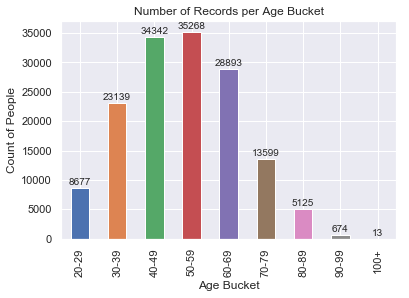

In [11]:
age_bucket_plot = df.groupby('age_bucket_name')['serious_delinquent'].count().plot(kind='bar')
age_bucket_plot.set_title('Number of Records per Age Bucket')
age_bucket_plot.set_xlabel('Age Bucket')
age_bucket_plot.set_ylabel('Count of People')
age_bucket_plot.set_xticklabels(age_bucket_col_names)
add_value_labels(age_bucket_plot,1)

plt.show()


### These are the total counts of those Age ranges that have been Serious Delinquent.


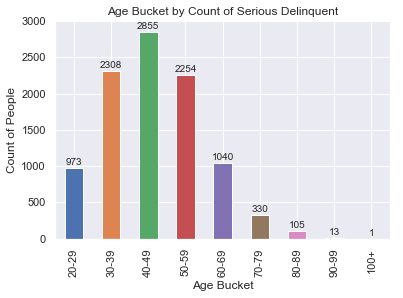

In [12]:
age_bucket_plot = df[(df['serious_delinquent'] > 0)].groupby('age_bucket_name')['serious_delinquent'].count().plot(kind='bar')
age_bucket_plot.set_title('Age Bucket by Count of Serious Delinquent')
age_bucket_plot.set_xlabel('Age Bucket')
age_bucket_plot.set_ylabel('Count of People')
age_bucket_plot.set_xticklabels(age_bucket_col_names)
add_value_labels(age_bucket_plot,1)
plt.show()

### And here are the averages of Serious Delinquent by Age range.  We observe that the younger you are, the higher chance that you will be Serious Delinquent. (as previously mentioned)
### The 100+ Age group had 1 of 13 people be Serious Delinquent so the higher average can be ignored due to not enough samples.

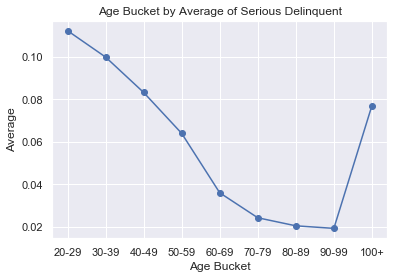

In [13]:
age_bucket_plot2 = df.groupby('age_bucket_name')['serious_delinquent'].mean().plot(kind='line', marker='o', grid=True)
age_bucket_plot2.set_title('Age Bucket by Average of Serious Delinquent')
age_bucket_plot2.set_xlabel('Age Bucket')
age_bucket_plot2.set_ylabel('Average')
age_bucket_plot2.set_xticklabels(age_bucket_col_name_line)
add_value_labels(age_bucket_plot2,1)
plt.show()

### Here we can see Serious Delinquent vs Total Sampled Count by Actual Age.  This is just another view of confirming that the younger Ages have a higher Probability of being Serious Delinquent.

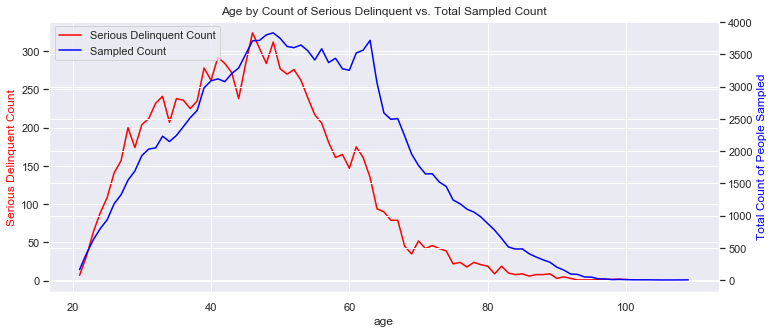

In [14]:
plt.figure(figsize=(12,5))
age_bucket_plot = df[(df['serious_delinquent'] > 0)].groupby('age')['serious_delinquent'].count().plot(kind='line', color='red', grid=True, label='Serious Delinquent Count')
age_bucket_plot.set_title('Age by Count of Serious Delinquent vs. Total Sampled Count')
age_bucket_plot.set_xlabel('Age')
age_bucket_plot.set_ylabel('Serious Delinquent Count', color='red')

age_bucket_plot2.name = 'Sampled Count'
age_bucket_plot2 = df.groupby('age')['serious_delinquent'].count().plot(color='blue', grid=True, secondary_y=True, label='Sampled Count')
age_bucket_plot2.set_ylabel('Total Count of People Sampled', color='blue')
h1, l1 = age_bucket_plot.get_legend_handles_labels()
h2, l2 = age_bucket_plot2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=2)

plt.show()

## Age vs. Past Due 90+ Days



### Like the Age vs. Serious Delinquency graphs, viewing the Ages by Past Due 90+ days shows us that the younger you are, the more likely you are to to be 90+ days late.

In [15]:
df.groupby('age_bucket_name')['past_due_90_plus_flag'].describe()

,count,mean,std,min,25%,50%,75%,max
age_bucket_name,,,,,,,,
20-29,8677.0,0.092544,0.289808,0.0,0.0,0.0,0.0,1.0
30-39,23139.0,0.080859,0.272625,0.0,0.0,0.0,0.0,1.0
40-49,34342.0,0.063829,0.244451,0.0,0.0,0.0,0.0,1.0
50-59,35268.0,0.053023,0.224082,0.0,0.0,0.0,0.0,1.0
60-69,28893.0,0.033814,0.180754,0.0,0.0,0.0,0.0,1.0
70-79,13599.0,0.019854,0.139505,0.0,0.0,0.0,0.0,1.0
80-89,5125.0,0.014634,0.120095,0.0,0.0,0.0,0.0,1.0
90-99,674.0,0.016320,0.126799,0.0,0.0,0.0,0.0,1.0
Over 100,13.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


### These are the total counts of those Age ranges that have been Past Due 90+ days.

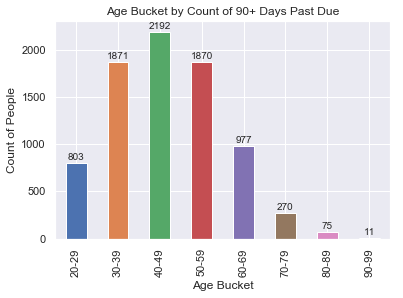

In [16]:
age_bucket_plot = df[(df['past_due_90_plus'] > 0)].groupby('age_bucket_name')['past_due_90_plus_flag'].count().plot(kind='bar')
age_bucket_plot.set_title('Age Bucket by Count of 90+ Days Past Due')
age_bucket_plot.set_xlabel('Age Bucket')
age_bucket_plot.set_ylabel('Count of People')
age_bucket_plot.set_xticklabels(age_bucket_col_names)
add_value_labels(age_bucket_plot,1)
plt.show()

### And here are the averages of Past Due 90+ days by Age range.  We observe that the younger you are, the higher chance that you will be 90+ days late. (as previously mentioned)

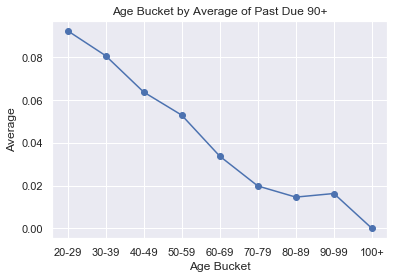

In [17]:
age_bucket_plot2 = df.groupby('age_bucket_name')['past_due_90_plus_flag'].mean().plot(kind='line', marker='o', grid=True)
age_bucket_plot2.set_title('Age Bucket by Average of Past Due 90+')
age_bucket_plot2.set_xlabel('Age Bucket')
age_bucket_plot2.set_ylabel('Average')
age_bucket_plot2.set_xticklabels(age_bucket_col_name_line)
add_value_labels(age_bucket_plot2,1)
plt.show()





### Here we can see Past Due 90+ vs Total Sampled Count by Actual Age.  This is just another view of confirming that the younger Ages have a higher Probability of being 90+ day late.

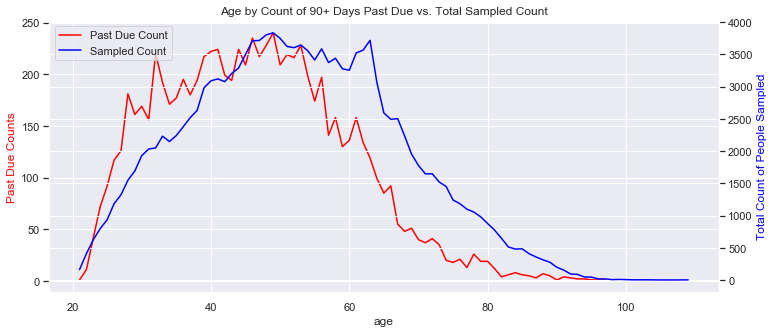

In [18]:
plt.figure(figsize=(12,5))
age_bucket_plot = df[(df['past_due_90_plus'] > 0)].groupby('age')['past_due_90_plus_flag'].count().plot(kind='line', color='red', grid=True, label='Past Due Count')
age_bucket_plot.set_title('Age by Count of 90+ Days Past Due vs. Total Sampled Count')
age_bucket_plot.set_xlabel('Age')
age_bucket_plot.set_ylabel('Past Due Counts', color='red')

age_bucket_plot2.name = 'Sampled Count'
age_bucket_plot2 = df.groupby('age')['past_due_90_plus_flag'].count().plot(color='blue', grid=True, secondary_y=True, label='Sampled Count')
age_bucket_plot2.set_ylabel('Total Count of People Sampled', color='blue')
h1, l1 = age_bucket_plot.get_legend_handles_labels()
h2, l2 = age_bucket_plot2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=2)

plt.show()

## Age vs. Past Due 60-89 Days



### Like the Serious Delinquency and Past Due 90+ data, viewing Ages by Past Due 60-89 Days shows us that the younger you are, the more likely you are to to be 60-89 days late.
### I want to make sure it is clear that being flagged as 60-89 days late means that you were at least 60 days late but paid before day 90.

In [19]:
df.groupby('age_bucket_name')['past_due_60_89_flag'].describe()

,count,mean,std,min,25%,50%,75%,max
age_bucket_name,,,,,,,,
20-29,8677.0,0.070647,0.256248,0.0,0.0,0.0,0.0,1.0
30-39,23139.0,0.067592,0.251049,0.0,0.0,0.0,0.0,1.0
40-49,34342.0,0.060625,0.238646,0.0,0.0,0.0,0.0,1.0
50-59,35268.0,0.050045,0.218042,0.0,0.0,0.0,0.0,1.0
60-69,28893.0,0.032395,0.177051,0.0,0.0,0.0,0.0,1.0
70-79,13599.0,0.019193,0.137206,0.0,0.0,0.0,0.0,1.0
80-89,5125.0,0.019122,0.136967,0.0,0.0,0.0,0.0,1.0
90-99,674.0,0.023739,0.152348,0.0,0.0,0.0,0.0,1.0
Over 100,13.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


### These are the total counts of those Age ranges that have been Past Due 60-89 Days.


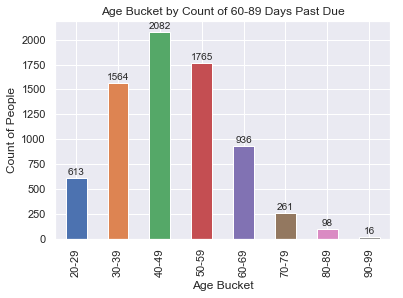

In [20]:
age_bucket_plot = df[(df['past_due_60_89_flag'] > 0)].groupby('age_bucket_name')['past_due_60_89_flag'].count().plot(kind='bar')
age_bucket_plot.set_title('Age Bucket by Count of 60-89 Days Past Due')
age_bucket_plot.set_xlabel('Age Bucket')
age_bucket_plot.set_ylabel('Count of People')
age_bucket_plot.set_xticklabels(age_bucket_col_names)
add_value_labels(age_bucket_plot,1)
plt.show()

### And here are the averages of Past Due 60-89 Days by Age range.  We observe that the younger you are, the higher chance that you will be 60-89 days late. (as previously mentioned)

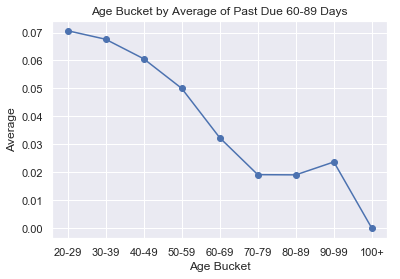

In [21]:
age_bucket_plot2 = df.groupby('age_bucket_name')['past_due_60_89_flag'].mean().plot(kind='line', marker='o', grid=True)
age_bucket_plot2.set_title('Age Bucket by Average of Past Due 60-89 Days')
age_bucket_plot2.set_xlabel('Age Bucket')
age_bucket_plot2.set_ylabel('Average')
age_bucket_plot2.set_xticklabels(age_bucket_col_name_line)
plt.show()



### Here we can see Past Due 60-89 Days vs Total Sampled Count by Actual Age.  This is just another view of confirming that the younger Ages have a higher Probability of being 60-89 days late.

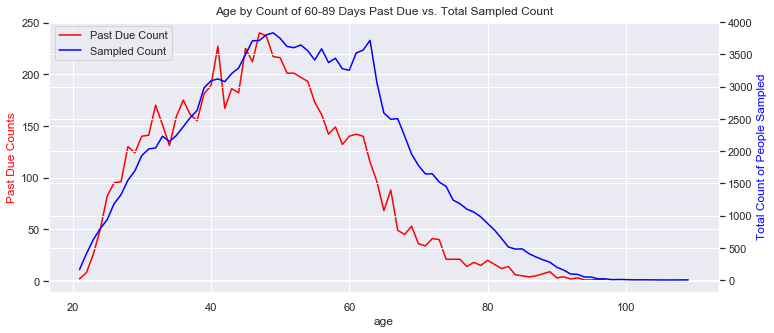

In [22]:
plt.figure(figsize=(12,5))
age_bucket_plot = df[(df['past_due_60_89_flag'] > 0)].groupby('age')['past_due_60_89_flag'].count().plot(kind='line', color='red', grid=True, label='Past Due Count')
age_bucket_plot.set_title('Age by Count of 60-89 Days Past Due vs. Total Sampled Count')
age_bucket_plot.set_xlabel('Age')
age_bucket_plot.set_ylabel('Past Due Counts', color='red')

age_bucket_plot2.name = 'Sampled Count'
age_bucket_plot2 = df.groupby('age')['past_due_60_89_flag'].count().plot(color='blue', grid=True, secondary_y=True, label='Sampled Count')
age_bucket_plot2.set_ylabel('Total Count of People Sampled', color='blue')
h1, l1 = age_bucket_plot.get_legend_handles_labels()
h2, l2 = age_bucket_plot2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=2)

plt.show()

## Age vs. Past Due 30-59 Days



### Like the other Past Due data, viewing Ages by Past Due 30-59 Days shows us, for the most part, that the younger you are, the more likely you are to to be 30-59 days late.
### Again, I want to make sure it is clear that being flagged as 30-59 days late means that you were at least 30 days late but paid before day 60.

In [23]:
df.groupby('age_bucket_name')['past_due_30_59_flag'].describe()

,count,mean,std,min,25%,50%,75%,max
age_bucket_name,,,,,,,,
20-29,8677.0,0.161231,0.367765,0.0,0.0,0.0,0.0,1.0
30-39,23139.0,0.187951,0.390682,0.0,0.0,0.0,0.0,1.0
40-49,34342.0,0.193873,0.395337,0.0,0.0,0.0,0.0,1.0
50-59,35268.0,0.174606,0.379635,0.0,0.0,0.0,0.0,1.0
60-69,28893.0,0.125324,0.331092,0.0,0.0,0.0,0.0,1.0
70-79,13599.0,0.081918,0.274250,0.0,0.0,0.0,0.0,1.0
80-89,5125.0,0.070439,0.255910,0.0,0.0,0.0,0.0,1.0
90-99,674.0,0.075668,0.264662,0.0,0.0,0.0,0.0,1.0
Over 100,13.0,0.076923,0.277350,0.0,0.0,0.0,0.0,1.0


### These are the total counts of those Age ranges that have been Past Due 30-59 Days.


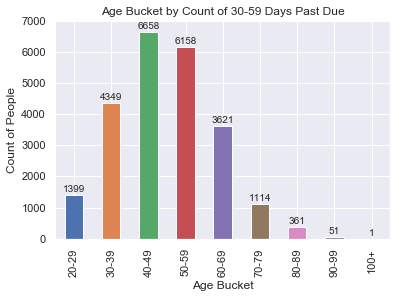

In [24]:
age_bucket_plot = df[(df['past_due_30_59_flag'] > 0)].groupby('age_bucket_name')['past_due_30_59_flag'].count().plot(kind='bar')
age_bucket_plot.set_title('Age Bucket by Count of 30-59 Days Past Due')
age_bucket_plot.set_xlabel('Age Bucket')
age_bucket_plot.set_ylabel('Count of People')
age_bucket_plot.set_xticklabels(age_bucket_col_names)
add_value_labels(age_bucket_plot,1)
plt.show()

### And here are the averages of Past Due 30-59 Days by Age range.  We observe that the younger you are, the higher chance that you will be 30-59 days late but do note that the 40-49 Age Range has the highest probability of being 30-59 days past due.

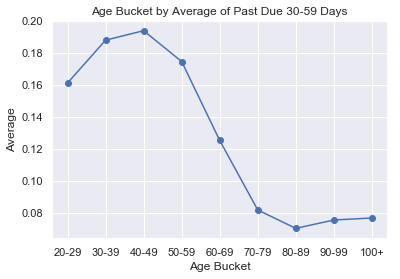

In [25]:
age_bucket_plot2 = df.groupby('age_bucket_name')['past_due_30_59_flag'].mean().plot(kind='line', marker='o', grid=True)
age_bucket_plot2.set_title('Age Bucket by Average of Past Due 30-59 Days')
age_bucket_plot2.set_xlabel('Age Bucket')
age_bucket_plot2.set_ylabel('Average')
age_bucket_plot2.set_xticklabels(age_bucket_col_name_line)
plt.show()



### Here we can see Past Due 30-59 Days vs Total Sampled Count by Actual Age.  

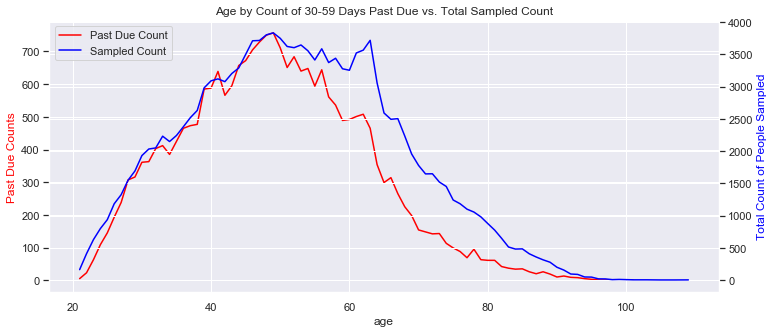

In [26]:
plt.figure(figsize=(12,5))
age_bucket_plot = df[(df['past_due_30_59_flag'] > 0)].groupby('age')['past_due_30_59_flag'].count().plot(kind='line', color='red', grid=True, label='Past Due Count')
age_bucket_plot.set_title('Age by Count of 30-59 Days Past Due vs. Total Sampled Count')
age_bucket_plot.set_xlabel('Age')
age_bucket_plot.set_ylabel('Past Due Counts', color='red')

age_bucket_plot2.name = 'Sampled Count'
age_bucket_plot2 = df.groupby('age')['past_due_30_59_flag'].count().plot(color='blue', grid=True, secondary_y=True, label='Sampled Count')
age_bucket_plot2.set_ylabel('Total Count of People Sampled', color='blue')
h1, l1 = age_bucket_plot.get_legend_handles_labels()
h2, l2 = age_bucket_plot2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=2)

plt.show()

### Counts by 30-59 Days Past Due, 60-89 Days Past Due, 90+ Days Past Due, and Serious Delinquent by Actual Age
#### Here we can see the actual age by Past Due Bucket but will we need to see the averages to view the full picture of what the data is.

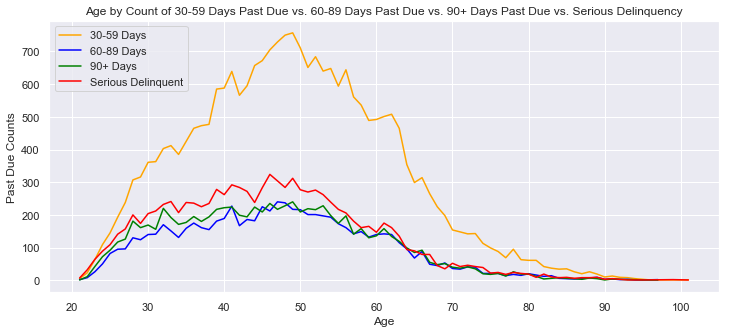

In [27]:
plt.figure(figsize=(12,5))
age_bucket_plot = df[(df['past_due_30_59_flag'] > 0)].groupby('age')['past_due_30_59_flag'].count().plot(kind='line', color='orange', grid=True, label='30-59 Days')
age_bucket_plot.set_title('Age by Count of 30-59 Days Past Due vs. 60-89 Days Past Due vs. 90+ Days Past Due vs. Serious Delinquency')
age_bucket_plot.set_xlabel('Age')
age_bucket_plot.set_ylabel('Past Due Counts')

age_bucket_plot2 = df[(df['past_due_60_89_flag'] > 0)].groupby('age')['past_due_60_89_flag'].count().plot(kind='line', color='blue', grid=True, label='60-89 Days')

age_bucket_plot3 = df[(df['past_due_90_plus_flag'] > 0)].groupby('age')['past_due_90_plus_flag'].count().plot(kind='line', color='green', grid=True, label='90+ Days')
age_bucket_plot4 = df[(df['serious_delinquent'] > 0)].groupby('age')['serious_delinquent'].count().plot(kind='line', color='red', grid=True, label='Serious Delinquent')
age_bucket_plot.set_xlabel('Age')
age_bucket_plot.set_ylabel('Past Due Counts')
h1, l1 = age_bucket_plot.get_legend_handles_labels()

plt.legend(h1, l1, loc=2)

plt.show()

### Averages by 30-59 Days Past Due, 60-89 Days Past Due, 90+ Days Past Due, and Serious Delinquent by Actual Age
### But this doesn't really give you a good idea when doing by Age, so I will plot it by Age Range next.

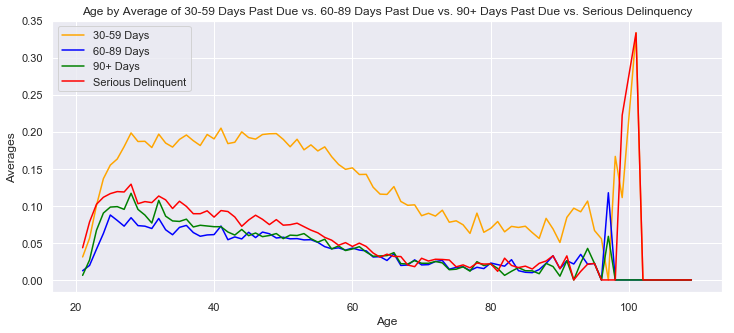

In [28]:
plt.figure(figsize=(12,5))
age_bucket_plot = df.groupby('age')['past_due_30_59_flag'].mean().plot(kind='line', color='orange', grid=True, label='30-59 Days')

age_bucket_plot2 = df.groupby('age')['past_due_60_89_flag'].mean().plot(kind='line', color='blue', grid=True, label='60-89 Days')
age_bucket_plot3 = df.groupby('age')['past_due_90_plus_flag'].mean().plot(kind='line', color='green', grid=True, label='90+ Days')
age_bucket_plot4 = df.groupby('age')['serious_delinquent'].mean().plot(kind='line', color='red', grid=True, label='Serious Delinquent')

age_bucket_plot.set_title('Age by Average of 30-59 Days Past Due vs. 60-89 Days Past Due vs. 90+ Days Past Due vs. Serious Delinquency')
age_bucket_plot.set_xlabel('Age')
age_bucket_plot.set_ylabel('Averages')

h1, l1 = age_bucket_plot.get_legend_handles_labels()

plt.legend(h1, l1, loc=2)

plt.show()

### Averages by 30-59 Days Past Due, 60-89 Days Past Due, 90+ Days Past Due, and Serious Delinquent by Age Bucket
### This is a good graph to see that if the averages for those who go 60-89 Days Past Due, 90+ Days Past Due, and Serious Delinquency are approximately the same.

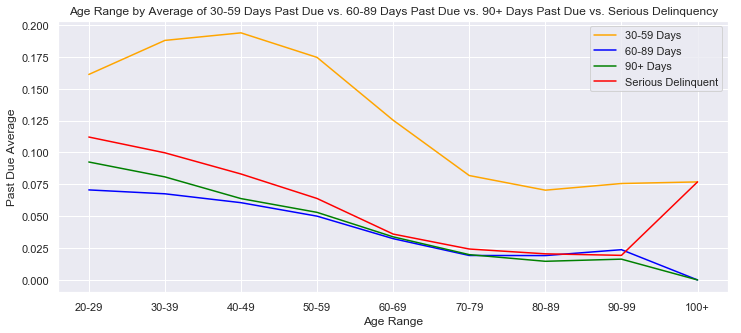

In [29]:
plt.figure(figsize=(12,5))
age_bucket_plot = df.groupby('age_bucket')['past_due_30_59_flag'].mean().plot(kind='line', color='orange', grid=True, label='30-59 Days')
age_bucket_plot.set_title('Age Range by Average of 30-59 Days Past Due vs. 60-89 Days Past Due vs. 90+ Days Past Due vs. Serious Delinquency')

age_bucket_plot2 = df.groupby('age_bucket')['past_due_60_89_flag'].mean().plot(kind='line', color='blue', grid=True, label='60-89 Days')
age_bucket_plot3 = df.groupby('age_bucket')['past_due_90_plus_flag'].mean().plot(kind='line', color='green', grid=True, label='90+ Days')
age_bucket_plot4 = df.groupby('age_bucket')['serious_delinquent'].mean().plot(kind='line', color='red', grid=True, label='Serious Delinquent')

age_bucket_plot.set_xlabel('Age Range')
age_bucket_plot.set_ylabel('Past Due Average')

age_bucket_plot.set_xticklabels(age_bucket_col_name_line)

h1, l1 = age_bucket_plot.get_legend_handles_labels() 

plt.legend(h1, l1, loc=1) #loc=1 is top right

plt.show()

## Monthly Income vs. Past Due 90+

### Viewing the Monthly Income by Past Due 90+ days shows us that the Monthly Income Buckets of 1000-2499 and 2500-4999 have the highest average of being Past Due 90+.  And as I expected, the more a person earns means that they have a less likely chance of being 90+ days late.

In [30]:
df.groupby(['monthly_income_bucket','monthly_income_name'])['past_due_90_plus_flag'].describe()

,,count,mean,std,min,25%,50%,75%,max
monthly_income_bucket,monthly_income_name,,,,,,,,
0,No Value,29610.0,0.050388,0.218749,0.0,0.0,0.0,0.0,1.0
1,0-499,2680.0,0.039552,0.194941,0.0,0.0,0.0,0.0,1.0
2,500-999,1722.0,0.063879,0.244609,0.0,0.0,0.0,0.0,1.0
3,1000-2499,12069.0,0.082940,0.275803,0.0,0.0,0.0,0.0,1.0
4,2500-4999,36493.0,0.074973,0.263352,0.0,0.0,0.0,0.0,1.0
5,5000-7499,30358.0,0.049904,0.217751,0.0,0.0,0.0,0.0,1.0
6,7500-9999,17014.0,0.034266,0.181917,0.0,0.0,0.0,0.0,1.0
7,10000-24999,18475.0,0.026143,0.159566,0.0,0.0,0.0,0.0,1.0
8,25000-49999,988.0,0.027328,0.163120,0.0,0.0,0.0,0.0,1.0


### These are the total counts of those Monthly Income Ranges.


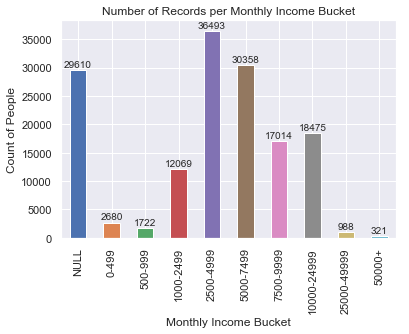

In [31]:
monthly_income_bucket_plot = df[(df['past_due_90_plus'] < 90)].groupby('monthly_income_bucket')['past_due_90_plus'].count().plot(kind='bar')
monthly_income_bucket_plot.set_title('Number of Records per Monthly Income Bucket')
monthly_income_bucket_plot.set_xlabel('Monthly Income Bucket')
monthly_income_bucket_plot.set_ylabel('Count of People')
monthly_income_bucket_plot.set_xticklabels(monthly_income_bucket_col_names)
add_value_labels(monthly_income_bucket_plot,1)
plt.show()

### And here are the averages of Past Due 90+ Days by Monthly Income range.  We observe that the 1000-2499 and 2500-4999 Monthly Income Ranges have the highest probability of being 90+ Days Past Due.

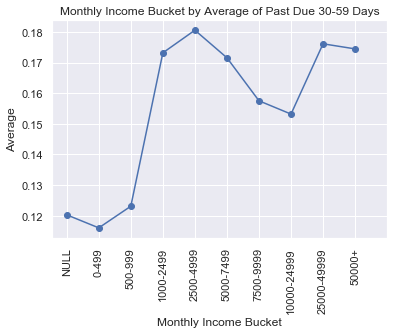

In [32]:
# This graph is showing the averages of Past Due 30-59 Days by Monthly Income Bucket.
monthly_income_bucket_plot = df.groupby('monthly_income_bucket')['past_due_30_59_flag'].mean().plot(kind='line', marker='o', grid=True)
monthly_income_bucket_plot.set_title('Monthly Income Bucket by Average of Past Due 30-59 Days')
monthly_income_bucket_plot.set_xlabel('Monthly Income Bucket')
monthly_income_bucket_plot.set_ylabel('Average')
monthly_income_bucket_plot.set_xticks(np.arange(len(monthly_income_bucket_col_line))) # Need to use set_xticks so that all labels show up.
monthly_income_bucket_plot.set_xticklabels(monthly_income_bucket_col_names, rotation=90)
# monthly_income_bucket_plot.set_ylim(bottom=0, top=max(df.groupby('monthly_income_bucket')['past_due_30_59_flag'].mean())*1.1)
plt.show()

### And here are the averages of the Past Due 60-89 Days by Monthly Income range.  The averages are showing about the same trends as 90+ days past due.

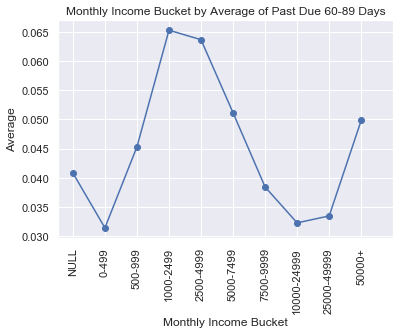

In [33]:
# This graph is showing the averages of Past Due 60-89 Days by Monthly Income Bucket.
monthly_income_bucket_plot = df.groupby('monthly_income_bucket')['past_due_60_89_flag'].mean().plot(kind='line', marker='o', grid=True)
monthly_income_bucket_plot.set_title('Monthly Income Bucket by Average of Past Due 60-89 Days')
monthly_income_bucket_plot.set_xlabel('Monthly Income Bucket')
monthly_income_bucket_plot.set_ylabel('Average')
monthly_income_bucket_plot.set_xticks(np.arange(len(monthly_income_bucket_col_line))) # Need to use set_xticks so that all labels show up.
monthly_income_bucket_plot.set_xticklabels(monthly_income_bucket_col_names, rotation=90)
plt.show()

### And here are the averages of the Past Due 30-59 Days by Monthly Income range.  The averages are flatter across the monthly income ranges starting at 1000-2499 and higher.

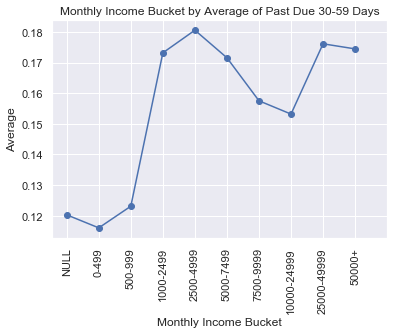

In [34]:
# This graph is showing the averages of Past Due 30-59 Days by Monthly Income Bucket.
monthly_income_bucket_plot = df.groupby('monthly_income_bucket')['past_due_30_59_flag'].mean().plot(kind='line', marker='o', grid=True)
monthly_income_bucket_plot.set_title('Monthly Income Bucket by Average of Past Due 30-59 Days')
monthly_income_bucket_plot.set_xlabel('Monthly Income Bucket')
monthly_income_bucket_plot.set_ylabel('Average')
monthly_income_bucket_plot.set_xticks(np.arange(len(monthly_income_bucket_col_line))) # Need to use set_xticks so that all labels show up.
monthly_income_bucket_plot.set_xticklabels(monthly_income_bucket_col_names, rotation=90)
plt.show()


### Averages by 30-59, 60-89, and 90+ Days Past Due by Monthly Income Range
### This is a good graph to see that if the averages for those who go 60-89 Days Past Due are about the same as those who go 90+ Days Past Due.

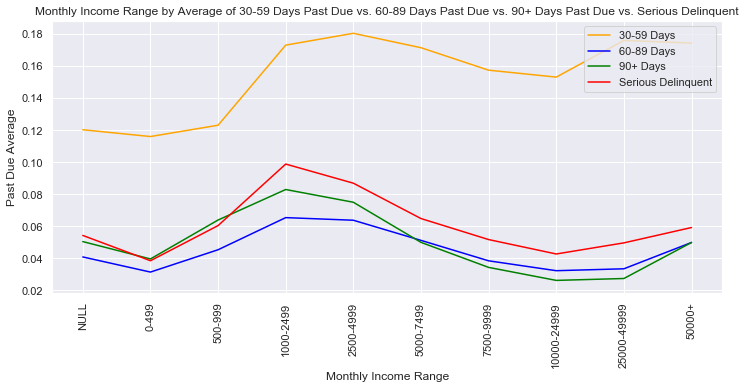

In [35]:
plt.figure(figsize=(12,5))
monthly_income_bucket_plot = df.groupby('monthly_income_bucket')['past_due_30_59_flag'].mean().plot(kind='line', color='orange', grid=True, label='30-59 Days')
monthly_income_bucket_plot.set_title('Monthly Income Range by Average of 30-59 Days Past Due vs. 60-89 Days Past Due vs. 90+ Days Past Due vs. Serious Delinquent')

monthly_income_bucket_plot2 = df.groupby('monthly_income_bucket')['past_due_60_89_flag'].mean().plot(kind='line', color='blue', grid=True, label='60-89 Days')
monthly_income_bucket_plot3 = df.groupby('monthly_income_bucket')['past_due_90_plus_flag'].mean().plot(kind='line', color='green', grid=True, label='90+ Days')
monthly_income_bucket_plot4 = df.groupby('monthly_income_bucket')['serious_delinquent'].mean().plot(kind='line', color='red', grid=True, label='Serious Delinquent')

monthly_income_bucket_plot.set_xlabel('Monthly Income Range')
monthly_income_bucket_plot.set_ylabel('Past Due Average')

plt.xticks(rotation=90)
monthly_income_bucket_plot.set_xticks(np.arange(len(monthly_income_bucket_col_names)))

monthly_income_bucket_plot.set_xticklabels(monthly_income_bucket_col_names)
add_value_labels(monthly_income_bucket_plot,2)
h1, l1 = monthly_income_bucket_plot.get_legend_handles_labels()

plt.legend(h1, l1, loc=1)

plt.show()

## Debt Ratio

### Average of Debt Ratio Quantiles by Serious Delinquency. 

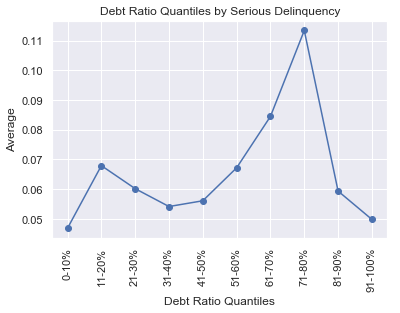

In [36]:
debt_ratio_plot = df.groupby('debt_ratio_bucket')['serious_delinquent'].mean().plot(kind='line', marker='o', grid=True)
debt_ratio_plot.set_title('Debt Ratio Quantiles by Serious Delinquency')
debt_ratio_plot.set_xlabel('Debt Ratio Quantiles')
debt_ratio_plot.set_ylabel('Average')
debt_ratio_plot.set_xticks(np.arange(len(debt_ratio_column_names))) # Need to use set_xticks so that all labels show up.
debt_ratio_plot.set_xticklabels(debt_ratio_column_names, rotation=90)
plt.show()





### Average of Debt Ratio Quantiles by Past Due 90+ Days. 

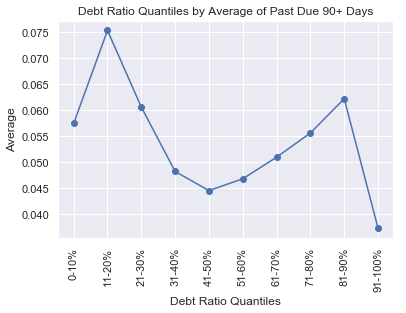

In [37]:
debt_ratio_plot = df.groupby('debt_ratio_bucket')['past_due_90_plus_flag'].mean().plot(kind='line', marker='o', grid=True)
debt_ratio_plot.set_title('Debt Ratio Quantiles by Average of Past Due 90+ Days')
debt_ratio_plot.set_xlabel('Debt Ratio Quantiles')
debt_ratio_plot.set_ylabel('Average')
debt_ratio_plot.set_xticks(np.arange(len(debt_ratio_column_names))) # Need to use set_xticks so that all labels show up.
debt_ratio_plot.set_xticklabels(debt_ratio_column_names, rotation=90)
plt.show()





### Average of Debt Ratio Quantiles by Past Due 60-89 Days. 

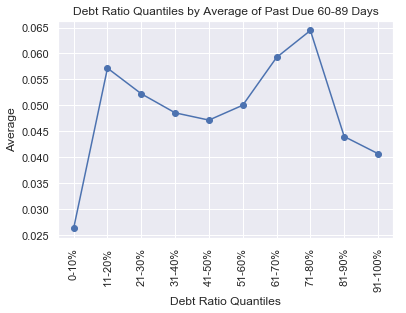

In [38]:
debt_ratio_plot = df.groupby('debt_ratio_bucket')['past_due_60_89_flag'].mean().plot(kind='line', marker='o', grid=True)
debt_ratio_plot.set_title('Debt Ratio Quantiles by Average of Past Due 60-89 Days')
debt_ratio_plot.set_xlabel('Debt Ratio Quantiles')
debt_ratio_plot.set_ylabel('Average')
debt_ratio_plot.set_xticks(np.arange(len(debt_ratio_column_names))) # Need to use set_xticks so that all labels show up.
debt_ratio_plot.set_xticklabels(debt_ratio_column_names, rotation=90)
plt.show()



### Average of Debt Ratio Quantiles by Past Due 30-59 Days. 

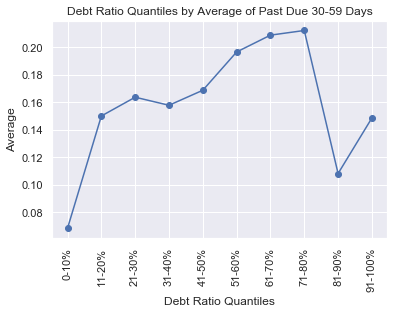

In [39]:
debt_ratio_plot = df.groupby('debt_ratio_bucket')['past_due_30_59_flag'].mean().plot(kind='line', marker='o', grid=True)
debt_ratio_plot.set_title('Debt Ratio Quantiles by Average of Past Due 30-59 Days')
debt_ratio_plot.set_xlabel('Debt Ratio Quantiles')
debt_ratio_plot.set_ylabel('Average')
debt_ratio_plot.set_xticks(np.arange(len(debt_ratio_column_names))) # Need to use set_xticks so that all labels show up.
debt_ratio_plot.set_xticklabels(debt_ratio_column_names, rotation=90)
plt.show()

### Averages by 30-59 Days Past Due, 60-89 Days Past Due, 90+ Days Past Due, and Serious Delinquent by Debt Ratio Quantiles

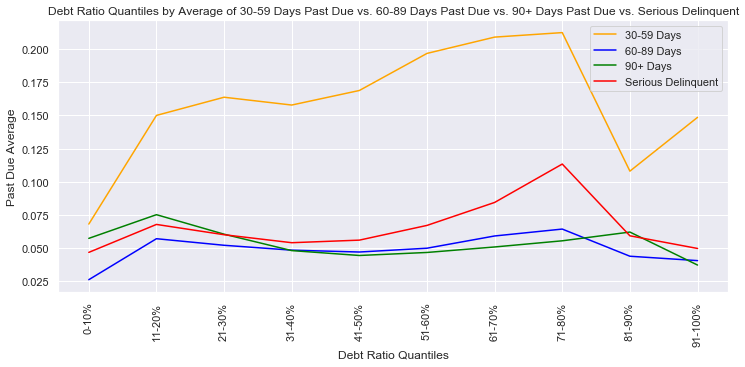

In [40]:
plt.figure(figsize=(12,5))
debt_ratio_plot = df.groupby('debt_ratio_bucket')['past_due_30_59_flag'].mean().plot(kind='line', color='orange', grid=True, label='30-59 Days')
debt_ratio_plot.set_title('Debt Ratio Quantiles by Average of 30-59 Days Past Due vs. 60-89 Days Past Due vs. 90+ Days Past Due vs. Serious Delinquent')

debt_ratio_plot2 = df.groupby('debt_ratio_bucket')['past_due_60_89_flag'].mean().plot(kind='line', color='blue', grid=True, label='60-89 Days')
debt_ratio_plot3 = df.groupby('debt_ratio_bucket')['past_due_90_plus_flag'].mean().plot(kind='line', color='green', grid=True, label='90+ Days')
debt_ratio_plot4 = df.groupby('debt_ratio_bucket')['serious_delinquent'].mean().plot(kind='line', color='red', grid=True, label='Serious Delinquent')

debt_ratio_plot.set_xlabel('Debt Ratio Quantiles')
debt_ratio_plot.set_ylabel('Past Due Average')

plt.xticks(rotation=90)
debt_ratio_plot.set_xticks(np.arange(len(debt_ratio_column_names)))

debt_ratio_plot.set_xticklabels(debt_ratio_column_names)
add_value_labels(debt_ratio_plot,1)
h1, l1 = debt_ratio_plot.get_legend_handles_labels()

plt.legend(h1, l1, loc=1)

plt.show()

### Total Count of People by Open Credit Line

## Open Credit Lines

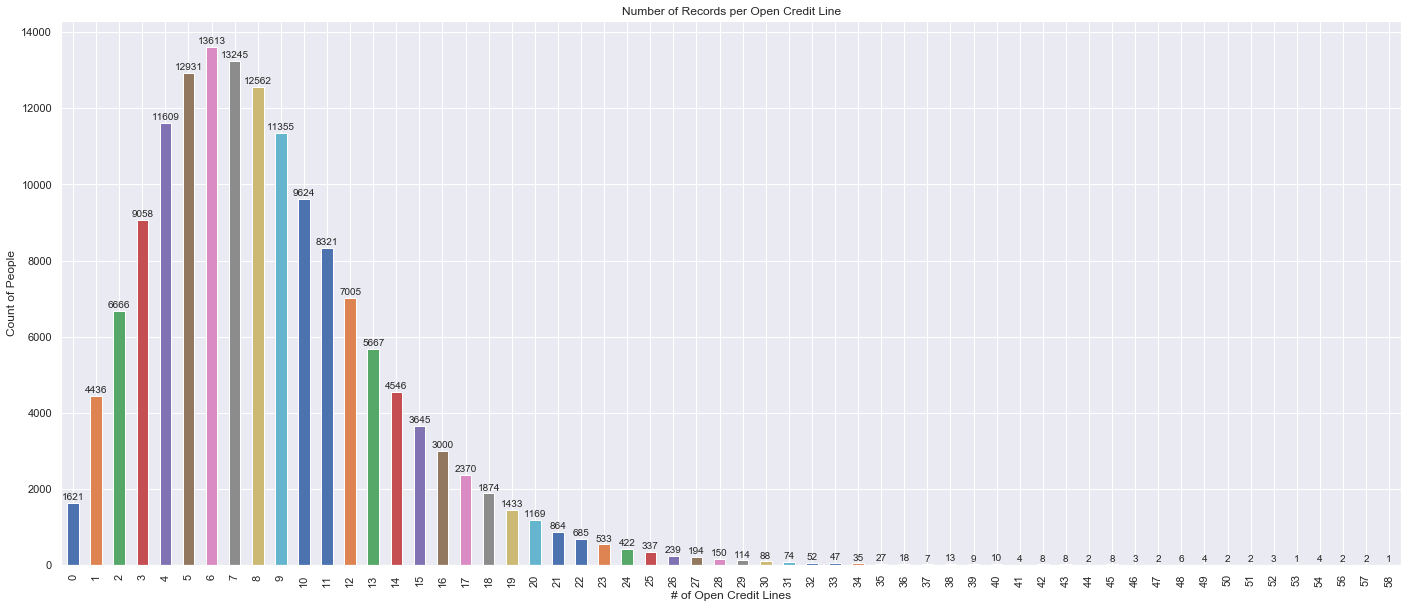

In [41]:
plt.figure(figsize=(24,10))
age_bucket_plot = df.groupby('open_credit_lines')['serious_delinquent'].count().plot(kind='bar', grid=True)
age_bucket_plot.set_title('Number of Records per Open Credit Line')
age_bucket_plot.set_xlabel('# of Open Credit Lines')
age_bucket_plot.set_ylabel('Count of People')
#age_bucket_plot.set_xticklabels(open_credit_lines)
add_value_labels(age_bucket_plot,1)

plt.show()


### Open Credit lines by Count of Past Due Buckets

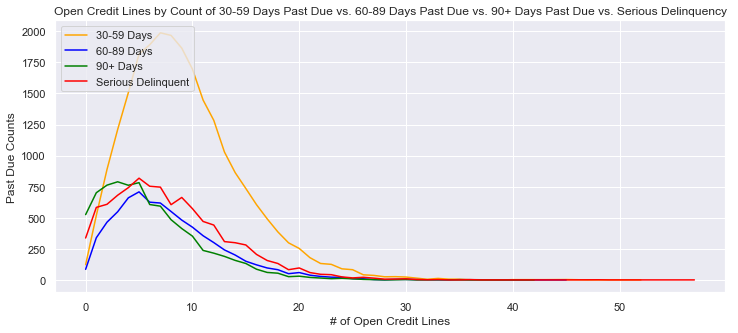

In [42]:
plt.figure(figsize=(12,5))
age_bucket_plot = df[(df['past_due_30_59_flag'] > 0)].groupby('open_credit_lines')['past_due_30_59_flag'].count().plot(kind='line', color='orange', grid=True, label='30-59 Days')
age_bucket_plot.set_title('Open Credit Lines by Count of 30-59 Days Past Due vs. 60-89 Days Past Due vs. 90+ Days Past Due vs. Serious Delinquency')


age_bucket_plot2 = df[(df['past_due_60_89_flag'] > 0)].groupby('open_credit_lines')['past_due_60_89_flag'].count().plot(kind='line', color='blue', grid=True, label='60-89 Days')

age_bucket_plot3 = df[(df['past_due_90_plus_flag'] > 0)].groupby('open_credit_lines')['past_due_90_plus_flag'].count().plot(kind='line', color='green', grid=True, label='90+ Days')
age_bucket_plot4 = df[(df['serious_delinquent'] > 0)].groupby('open_credit_lines')['serious_delinquent'].count().plot(kind='line', color='red', grid=True, label='Serious Delinquent')
age_bucket_plot.set_xlabel('# of Open Credit Lines')
age_bucket_plot.set_ylabel('Past Due Counts')
h1, l1 = age_bucket_plot.get_legend_handles_labels()

plt.legend(h1, l1, loc=2)

plt.show()

### So we don't misrepresent the averages, I am going to exclude all Open Credit Lines with a Total Count of < 500 People.

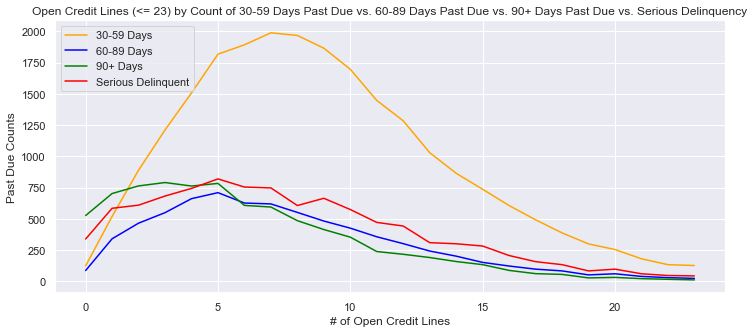

In [43]:
plt.figure(figsize=(12,5))
age_bucket_plot = df[(df['past_due_30_59_flag'] > 0) & (df['open_credit_lines'] <= 23)].groupby('open_credit_lines')['past_due_30_59_flag'].count().plot(kind='line', color='orange', grid=True, label='30-59 Days')
age_bucket_plot.set_title('Open Credit Lines (<= 23) by Count of 30-59 Days Past Due vs. 60-89 Days Past Due vs. 90+ Days Past Due vs. Serious Delinquency')


age_bucket_plot2 = df[(df['past_due_60_89_flag'] > 0) & (df['open_credit_lines'] <= 23)].groupby('open_credit_lines')['past_due_60_89_flag'].count().plot(kind='line', color='blue', grid=True, label='60-89 Days')

age_bucket_plot3 = df[(df['past_due_90_plus_flag'] > 0) & (df['open_credit_lines'] <= 23)].groupby('open_credit_lines')['past_due_90_plus_flag'].count().plot(kind='line', color='green', grid=True, label='90+ Days')
age_bucket_plot4 = df[(df['serious_delinquent'] > 0) & (df['open_credit_lines'] <= 23)].groupby('open_credit_lines')['serious_delinquent'].count().plot(kind='line', color='red', grid=True, label='Serious Delinquent')
age_bucket_plot.set_xlabel('# of Open Credit Lines')
age_bucket_plot.set_ylabel('Past Due Counts')
h1, l1 = age_bucket_plot.get_legend_handles_labels()

plt.legend(h1, l1, loc=2)

plt.show()

### It appears that the 60-89, 90+, and Serious Delinquent Averages are flat after the # of Open Credit Lines reaches ~4 and above.

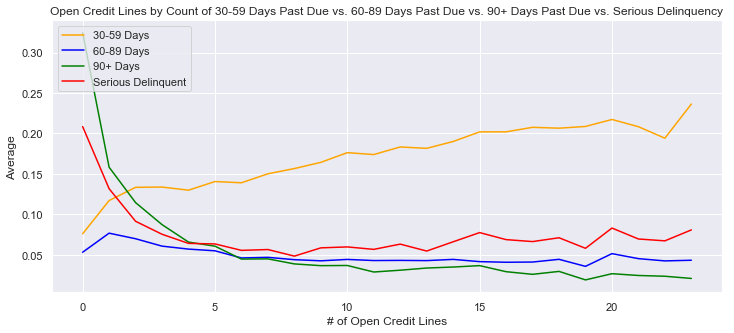

In [44]:
plt.figure(figsize=(12,5))
age_bucket_plot = df[(df['open_credit_lines'] <= 23)].groupby('open_credit_lines')['past_due_30_59_flag'].mean().plot(kind='line', color='orange', grid=True, label='30-59 Days')
age_bucket_plot.set_title('Open Credit Lines by Count of 30-59 Days Past Due vs. 60-89 Days Past Due vs. 90+ Days Past Due vs. Serious Delinquency')


age_bucket_plot2 = df[(df['open_credit_lines'] <= 23)].groupby('open_credit_lines')['past_due_60_89_flag'].mean().plot(kind='line', color='blue', grid=True, label='60-89 Days')

age_bucket_plot3 = df[(df['open_credit_lines'] <= 23)].groupby('open_credit_lines')['past_due_90_plus_flag'].mean().plot(kind='line', color='green', grid=True, label='90+ Days')
age_bucket_plot4 = df[(df['open_credit_lines'] <= 23)].groupby('open_credit_lines')['serious_delinquent'].mean().plot(kind='line', color='red', grid=True, label='Serious Delinquent')
age_bucket_plot.set_xlabel('# of Open Credit Lines')
age_bucket_plot.set_ylabel('Average')
h1, l1 = age_bucket_plot.get_legend_handles_labels()

plt.legend(h1, l1, loc=2)

plt.show()

In [45]:
# plt.figure(figsize=(24,10))
# age_bucket_plot = df.groupby('unsecured_lines')['serious_delinquent'].plot(kind='hist', grid=True)
# age_bucket_plot.set_title('Number of Records per Open Credit Line')
# age_bucket_plot.set_xlabel('# of Open Credit Lines')
# age_bucket_plot.set_ylabel('Count of People')
#age_bucket_plot.set_xticklabels(open_credit_lines)
#add_value_labels(age_bucket_plot,1)

# plt.show()


## Unsecured Lines

### From the above we can see that some data has really high Unsecured Lines values.  The highest value is 50,708 but only a total count of 371 out of our 150k population have a value of 2 or more.  

In [46]:
df[:][df['unsecured_lines'] >= 2].describe()


,age,age_bucket,debt_ratio,debt_ratio_bucket,debt_ratio_name,monthly_income,monthly_income_bucket,past_due_30_59,past_due_30_59_flag,past_due_60_89,past_due_60_89_flag,past_due_90_plus,past_due_90_plus_flag,open_credit_lines,serious_delinquent,unsecured_lines,real_estate_loans,number_of_dependents
count,371.000000,371.00000,371.000000,371.000000,371.000000,278.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.00000,371.000000,371.000000,371.000000,371.000000,371.000000,356.000000
mean,48.568733,3.38814,471.795323,4.843666,171.866368,7883.525180,3.876011,0.398922,0.215633,0.185984,0.123989,0.35310,0.137466,6.026954,0.145553,2316.264874,1.018868,0.721910
std,13.942255,1.42194,1527.635329,2.888436,433.985825,6419.810959,2.594327,0.976701,0.411816,0.628527,0.330014,1.28898,0.344804,3.604701,0.353133,4463.548126,1.071584,1.050109
min,23.000000,1.00000,0.000800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.003992,0.000000,0.000000
25%,37.000000,2.00000,0.206037,2.000000,0.134926,4000.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3.500000,0.000000,3.401210,0.000000,0.000000
50%,47.000000,3.00000,0.381209,5.000000,0.367119,6358.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,5.000000,0.000000,815.000000,1.000000,0.000000
75%,58.000000,4.00000,22.731707,8.000000,4.000000,10000.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,8.000000,0.000000,2835.500000,2.000000,1.000000
max,87.000000,7.00000,21395.000000,9.000000,1270.000000,44472.000000,8.000000,7.000000,1.000000,7.000000,1.000000,15.00000,1.000000,21.000000,1.000000,50708.000000,9.000000,4.000000


### By not including Unsecured Lines >= 2, the mean and quartiles look much more reasonable.

In [47]:
df[:][df['unsecured_lines'] < 2].describe()

,age,age_bucket,debt_ratio,debt_ratio_bucket,debt_ratio_name,monthly_income,monthly_income_bucket,past_due_30_59,past_due_30_59_flag,past_due_60_89,past_due_60_89_flag,past_due_90_plus,past_due_90_plus_flag,open_credit_lines,serious_delinquent,unsecured_lines,real_estate_loans,number_of_dependents
count,149359.000000,149359.000000,149359.000000,149359.000000,149359.000000,1.198420e+05,149359.000000,149359.000000,149359.000000,149359.000000,149359.000000,149359.000000,149359.000000,149359.000000,149359.000000,149359.000000,149359.000000,145481.000000
mean,52.337321,3.784432,353.337803,4.498571,127.486799,6.672492e+03,3.888999,0.245409,0.158223,0.064522,0.048802,0.089804,0.053683,8.474012,0.065781,0.319107,1.020066,0.757934
std,14.755184,1.503635,2040.708448,2.871605,380.629566,1.440581e+04,2.315838,0.696910,0.364951,0.328944,0.215454,0.481701,0.225391,5.139912,0.247900,0.354611,1.130106,1.115539
min,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,3.000000,0.175933,2.000000,0.134926,3.400000e+03,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.029628,0.000000,0.000000
50%,52.000000,4.000000,0.367099,4.000000,0.288126,5.400000e+03,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.152290,1.000000,0.000000
75%,63.000000,5.000000,0.868985,7.000000,0.650162,8.249750e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.550690,2.000000,1.000000
max,109.000000,9.000000,329664.000000,9.000000,1270.000000,3.008750e+06,9.000000,13.000000,1.000000,11.000000,1.000000,17.000000,1.000000,58.000000,1.000000,1.998676,54.000000,20.000000


### Unsecured Lines between 0 and 2

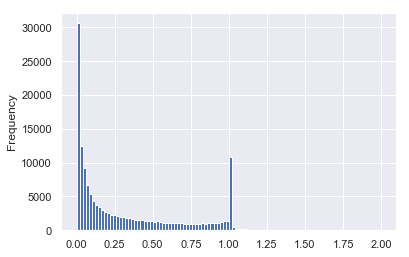

In [48]:
df['unsecured_lines'][df['unsecured_lines'] < 2].plot(kind='hist', grid=True, bins=100)

### But even though we exclude all unsecured lines >= 2, our histogram still points that most data is between 0.00 and 1.00.  I am going to exclude data > 1 since there is a total of 3,321 records.

In [49]:
df[:][df['unsecured_lines'] >1].describe()

,age,age_bucket,debt_ratio,debt_ratio_bucket,debt_ratio_name,monthly_income,monthly_income_bucket,past_due_30_59,past_due_30_59_flag,past_due_60_89,past_due_60_89_flag,past_due_90_plus,past_due_90_plus_flag,open_credit_lines,serious_delinquent,unsecured_lines,real_estate_loans,number_of_dependents
count,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,2773.000000,3321.000000,3321.000000,3321.000000,3321.00000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3260.000000
mean,44.055405,2.959048,245.169459,4.530262,81.380373,5289.567977,3.712436,1.016260,0.515206,0.43240,0.275519,0.637760,0.305029,6.373683,0.372478,259.773362,0.682023,0.917791
std,12.655322,1.304352,939.844850,2.728432,309.651027,5134.134472,2.023237,1.355169,0.499844,0.85219,0.446843,1.325063,0.460489,4.033118,0.483538,1659.034074,0.973476,1.197826
min,21.000000,1.000000,0.000800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000059,0.000000,0.000000
25%,34.000000,2.000000,0.180627,2.000000,0.134926,2700.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.000000,0.000000,1.019996,0.000000,0.000000
50%,43.000000,3.000000,0.374304,5.000000,0.367119,4184.000000,4.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,6.000000,0.000000,1.074633,0.000000,0.000000
75%,52.000000,4.000000,0.806048,7.000000,0.650162,6458.000000,5.000000,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000,8.000000,1.000000,1.301096,1.000000,2.000000
max,88.000000,7.000000,21395.000000,9.000000,1270.000000,141500.000000,9.000000,10.000000,1.000000,7.00000,1.000000,15.000000,1.000000,40.000000,1.000000,50708.000000,10.000000,8.000000


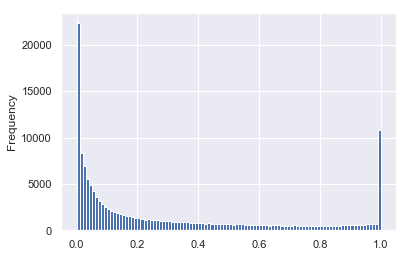

In [50]:
df['unsecured_lines'][df['unsecured_lines'] <= 1].plot(kind='hist', grid=True, bins=100)

# ANNEX 2 (other graphs)

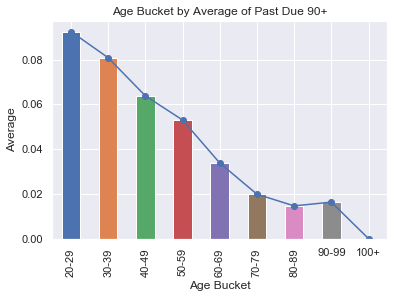

In [51]:
# This type of graph was removed... Kept the Line Graphs for each Past Due Bucket.

ax =df.groupby('age_bucket_name')['past_due_90_plus_flag'].mean().plot(x='age_bucket_name', linestyle='-', marker='o')
age_bucket_plot2 = df.groupby('age_bucket_name')['past_due_90_plus_flag'].mean().plot(kind='bar', ax=ax)
age_bucket_plot2.set_title('Age Bucket by Average of Past Due 90+')
age_bucket_plot2.set_xlabel('Age Bucket')
age_bucket_plot2.set_ylabel('Average')
age_bucket_plot2.set_xticklabels(age_bucket_col_names)
plt.show()


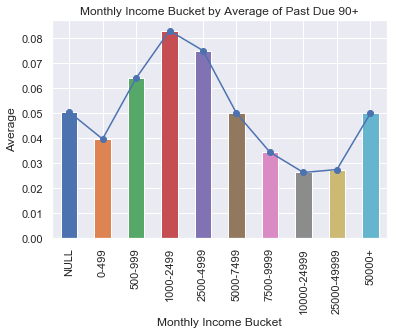

In [52]:
# This graph is showing the averages of Past Due 90+ Days by Monthly Income Bucket.
# The same graphs were made for the other Past Due buckets.  They are now line graphs.
ax = df.groupby('monthly_income_bucket')['past_due_90_plus_flag'].mean().plot(x='monthly_income_bucket', linestyle='-', marker='o')
monthly_income_bucket_plot = df.groupby('monthly_income_bucket')['past_due_90_plus_flag'].mean().plot(kind='bar', ax=ax)
monthly_income_bucket_plot.set_title('Monthly Income Bucket by Average of Past Due 90+')
monthly_income_bucket_plot.set_xlabel('Monthly Income Bucket')
monthly_income_bucket_plot.set_ylabel('Average')
monthly_income_bucket_plot.set_xticklabels(monthly_income_bucket_col_names)
plt.show()

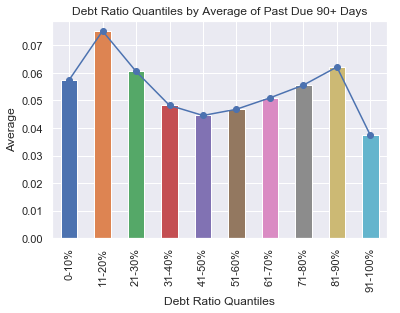

In [53]:
# This graph is showing averages of Past Due 90+ Days by Debt Ratio
# The same was done for the other Past Due buckets.
ax = df.groupby('debt_ratio_bucket')['past_due_90_plus_flag'].mean().plot(x='debt_ratio_bucket', linestyle='-', marker='o')
debt_ratio_plot = df.groupby('debt_ratio_bucket')['past_due_90_plus_flag'].mean().plot(kind='bar', ax=ax)
debt_ratio_plot.set_title('Debt Ratio Quantiles by Average of Past Due 90+ Days')
debt_ratio_plot.set_xlabel('Debt Ratio Quantiles')
debt_ratio_plot.set_ylabel('Average')
debt_ratio_plot.set_xticklabels(debt_ratio_column_names)
plt.show()

In [54]:
# We know that there are ~30k records where the Monthly Income was NULL.  Let's see how excluding those NULL values changes the describe stats.  Excluding those NULL Monthly Incomes brought down up the Monthly Income Average and decreased the Debt Ratio Average but Past Due 90+ and Serious Delinquency stayed about the same. 
df[:][df['monthly_income'] >= 0].describe()




,age,age_bucket,debt_ratio,debt_ratio_bucket,debt_ratio_name,monthly_income,monthly_income_bucket,past_due_30_59,past_due_30_59_flag,past_due_60_89,past_due_60_89_flag,past_due_90_plus,past_due_90_plus_flag,open_credit_lines,serious_delinquent,unsecured_lines,real_estate_loans,number_of_dependents
count,120120.000000,120120.000000,120120.000000,120120.000000,120120.000000,1.201200e+05,120120.000000,120120.000000,120120.000000,120120.000000,120120.000000,120120.000000,120120.000000,120120.000000,120120.000000,120120.000000,120120.000000,120120.000000
mean,51.309232,3.681494,26.631760,3.626457,9.284930,6.675295e+03,4.847611,0.261555,0.167749,0.067383,0.051007,0.091508,0.054754,8.769272,0.068873,5.905950,1.055811,0.852173
std,14.417093,1.470748,424.708591,2.342709,106.304529,1.439255e+04,1.429034,0.719067,0.373645,0.336565,0.220014,0.489231,0.227500,5.166914,0.253239,257.199999,1.149386,1.148539
min,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,3.000000,0.144103,2.000000,0.134926,3.400000e+03,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.034979,0.000000,0.000000
50%,51.000000,4.000000,0.296344,4.000000,0.288126,5.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.176695,1.000000,0.000000
75%,61.000000,5.000000,0.482859,6.000000,0.468174,8.250000e+03,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.577123,2.000000,2.000000
max,103.000000,9.000000,61106.500000,9.000000,1270.000000,3.008750e+06,9.000000,13.000000,1.000000,11.000000,1.000000,17.000000,1.000000,58.000000,1.000000,50708.000000,54.000000,20.000000


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


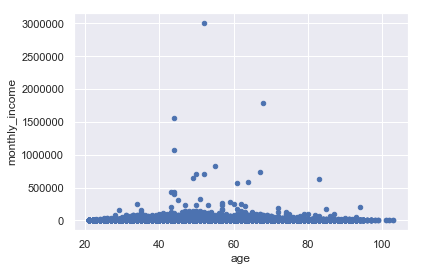

In [55]:
#There are a few outliers in the Monthly Income values.

df.plot(x='age',
        y='monthly_income',
       kind='scatter')

plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


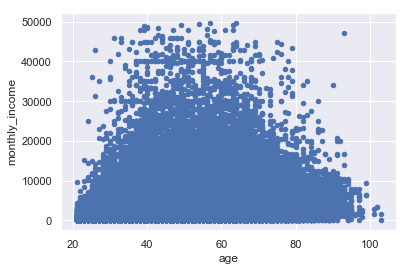

In [56]:
# When excluding Monthly Income Values > $50k, we can see that middle aged (50-60) people get paid the most

df[:][df['monthly_income'] < 50000].plot(x='age',
        y='monthly_income',
       kind='scatter')

plt.show()

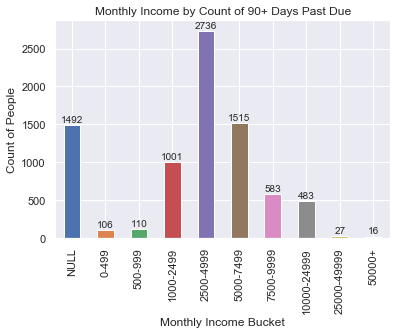

In [57]:
# I don't think it is necessary to show the actual counts of monthly incomes by past due bucket.
monthly_income_bucket_plot = df[(df['past_due_90_plus'] > 0)].groupby('monthly_income_bucket')['past_due_90_plus_flag'].count().plot(kind='bar')
monthly_income_bucket_plot.set_title('Monthly Income by Count of 90+ Days Past Due')
monthly_income_bucket_plot.set_xlabel('Monthly Income Bucket')
monthly_income_bucket_plot.set_ylabel('Count of People')
monthly_income_bucket_plot.set_xticklabels(monthly_income_bucket_col_names)
add_value_labels(monthly_income_bucket_plot,1)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


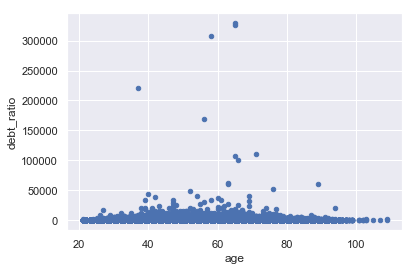

In [58]:
#There are a few outliers in the Monthly Income values.

df.plot(x='age',
        y='debt_ratio',
       kind='scatter')

plt.show()